## Avalanche Fatalities 

## in this notebook

- scraping html table 
- data cleaning
- data analysis
- visualizations

In [182]:
import pandas as pd
import numpy as np
from IPython.display import HTML as showpage
import matplotlib.pyplot as plt 
import seaborn as sns 
import folium
import requests as s
import datetime
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
url = 'https://utahavalanchecenter.org/avalanches/fatalities'
headers = {'User-Agent': 'Mozilla/5.0'}
page_html = s.get(url=url, headers=headers).text

In [4]:
# showing the page
showpage(page_html)

Date,Region,Place,Trigger,Number Killed,,Coordinates
01/31/2016,Salt Lake,Pointy Peak,Skier,1,Details,"40.681035109898, -111.598269411350"
01/21/2016,Salt Lake,Gobblers Knob,Skier,1,Details,"40.666951474815, -111.685399884810"
03/4/2015,Ogden,Hells Canyon,Snowboarder,1,Details,"41.215552643517, -111.873779284110"
03/7/2014,Uintas,Gold Hill,Snowmobiler,1,Details,"40.812120000000, -110.906296000000"
02/9/2014,Skyline,Huntington Reservior,Snowmobiler,1,Details,"39.585986000000, -111.270003000000"
02/8/2014,Salt Lake,Tibble Fork,Snowshoer,1,Details,"40.482366000000, -111.648088000000"
04/11/2013,Salt Lake,Kessler Slabs,Skier,1,Details,"40.629000000000, -111.666412000000"
03/1/2013,Skyline,White Mountain,Snowmobiler,1,Details,"39.043600000000, -111.519000000000"
01/18/2013,Uintas,West Fork of Duchesne,Snowmobiler,2,Details,
03/3/2012,Moab,Beaver Basin,Snowmobiler,1,Details,"38.539320000000, -109.209852000000"


In [5]:
#reading the html table using pandas 
data = pd.read_html(page_html)[0]
#saving the data to desk as a csv file
data.to_csv('avalanches_fatalities.csv')

In [188]:
#reading the data
data = pd.read_csv('avalanches_fatalities.csv')

In [189]:
# converting the date coloumn to a datetime object and setting it as index
data['date'] = pd.to_datetime(data.Date)
data.set_index(data.date, inplace=True)

In [190]:
#creating a year and a month coloumns
data['year'] = pd.to_datetime(data.Date).dt.year
data['month'] = pd.to_datetime(data.Date).dt.month

In [193]:
def make_months():
    """returns a dict containing the number of the month as a key and it's name as a value"""
    months_choices = []
    for i in range(1,13):
        months_choices.append((i, datetime.date(2008, i, 1).strftime('%B')))
    return dict(months_choices)

In [194]:
zeros = pd.Series(np.arange(1,13,dtype='int'),index= np.zeros(12,dtype='int'))
data_by_month = data.month.append(zeros, ignore_index=True).map(make_months())

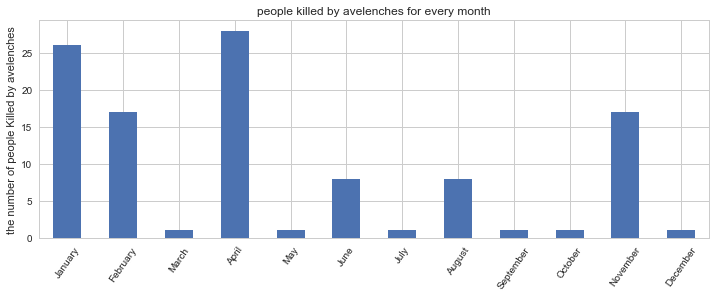

In [245]:
plt.figure(figsize=(12,4))
data_by_month.value_counts(sort=False).plot(kind='bar')
plt.xticks(np.arange(12),make_months().values())
plt.ylabel('the number of people Killed by avelenches')
plt.title('people killed by avelenches for every month')
plt.xticks(rotation = 55);

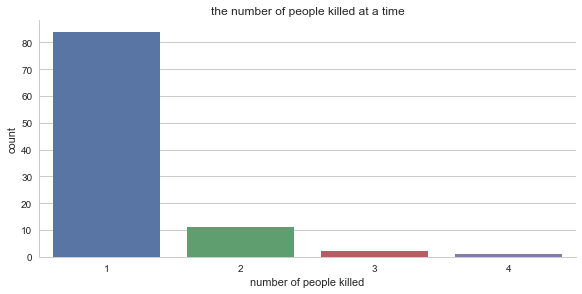

In [246]:
sns.factorplot(x='Number Killed', data=data, kind='count',aspect=2)
plt.xlabel('number of people killed')
plt.title('the number of people killed at a time');

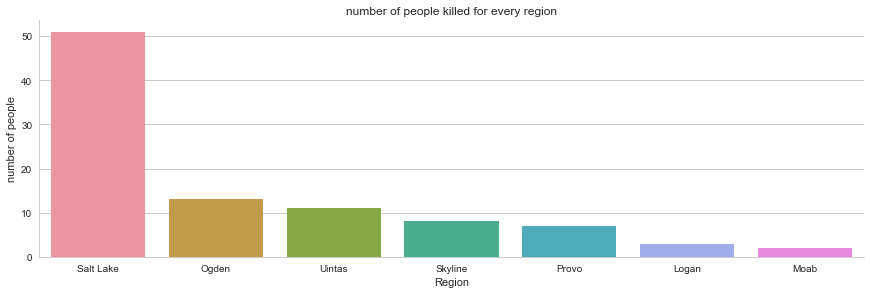

In [254]:
data.Region.replace('None', np.nan, inplace=True)
order = data.Region.value_counts().index
sns.factorplot(x='Region', data=data, kind='count', aspect=3, order=order)
plt.ylabel('number of people')
plt.title('number of people killed for every region');

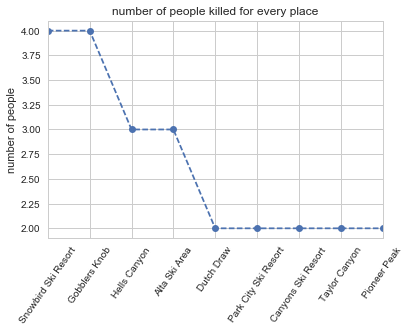

In [263]:
data.Place.value_counts().head(9).plot(linestyle='dashed', marker='o')
plt.xticks(rotation=55)
plt.title('number of people killed for every place')
plt.ylabel('number of people');

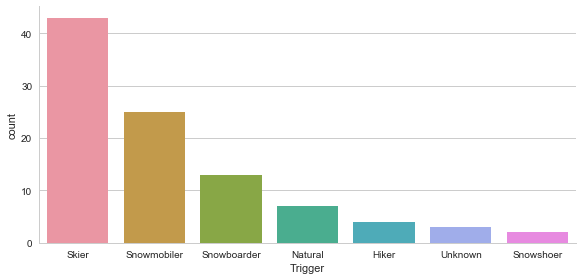

In [271]:
sns.factorplot(x='Trigger', data=data, kind='count',aspect=2, order= data.Trigger.value_counts().index);

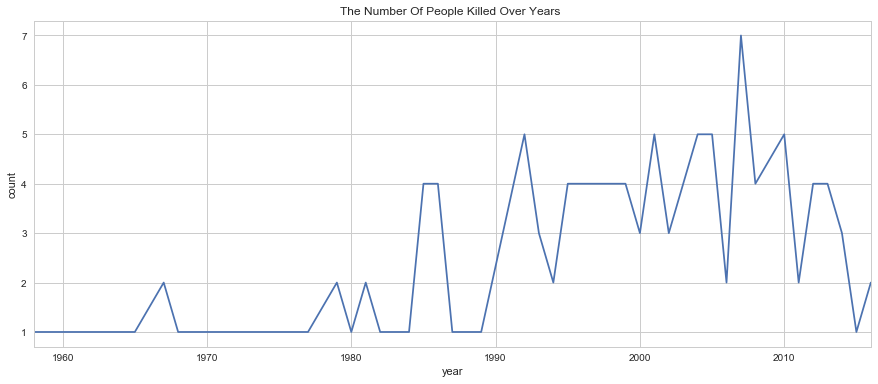

In [273]:
plt.figure(figsize=(15,6))
data.groupby('year').sum()['Number Killed'].plot()
plt.title('The Number Of People Killed Over Years ')
plt.ylabel('count');

In [274]:
def lat_lon(row,ind='lat'):
    """returns latitude if ind == lat and longitude if ind == lat"""
    if  ind == 'lat':    
        return str(row).split(',')[0]
    elif ind == 'lon':
        if str(row).lower() == 'nan':
            return 'nan'
        return str(row).split(',')[1]
    else:
        return 0 

In [13]:
#creating latitude and longitude coloums 
data['latitude'] =  data.Coordinates.apply(lat_lon)
data['longitude'] = data.Coordinates.apply(lat_lon,ind='lon')

In [14]:
pos = data[['latitude', 'longitude']]
pos = pos.replace('nan', np.nan)
pos = pos.dropna()
# creating list of tuples contining (lat,lon)
pos_tuples = ([x for x in zip(pos.latitude, pos.longitude)])

### plotting the location of deaths 

In [38]:
m1 = folium.Map(location=pos_tuples[0],tiles='Stamen Terrain')
for i in pos_tuples:
    folium.Marker(location=i).add_to(m1)
m1